In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('heart_attack_youth_vs_adult_pakistan.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.75 seconds

Missing values: 133631
Duplicated values: 199994

Missing values by column:
Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64

Unique Values in Each Column:
Age                      66
Gende

In [2]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Age', 'BMI', 'Cholesterol_Level', 'Sleep_Hours', 'Blood_Pressure', 'Heart_Rate', 'Blood_Sugar']
Categorical Columns: ['Gender', 'Region', 'Smoker', 'Diabetes', 'Hypertension', 'Physical_Activity', 'Diet', 'Family_History', 'Stress_Level', 'Alcohol_Consumption', 'Drug_Use', 'Chest_Pain', 'ECG_Results', 'Angina', 'Cardiac_Arrest', 'Recovery_Status', 'Medication', 'Follow_Up']


In [3]:
df.head()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,99,87,No,Normal,191.0,No,No,Recovered,Yes,Regular
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,128,89,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular


In [4]:
for column in non_numerical_columns:
    df[column] = df[column].fillna('Unknown')

In [5]:
df = df.drop(columns=['Region', 'Family_History', 'Recovery_Status', 'Follow_Up'])

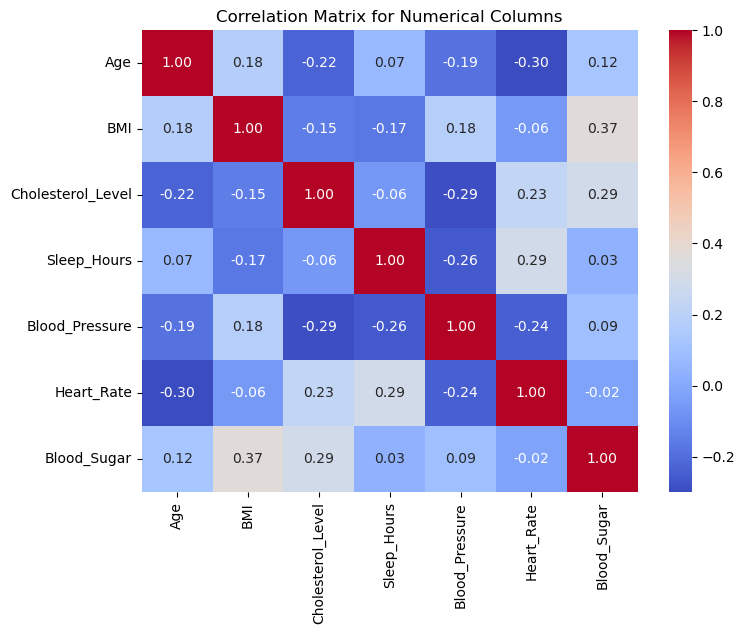

In [6]:
import seaborn as sns
df_sampled = df.sample(n=20) # ข้อมูลที่ใช้เยอะเกินไปจะทำให้กราฟที่แสดงข้อมูลไม่ชัดเจน
numerical_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df_sampled[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union
import numpy as np


def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = df,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
    sample_data: int = 30,
) -> None:

    # Input validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if Categorical_Columns not in data.columns:
        raise ValueError(f"Column '{Categorical_Columns}' not found in DataFrame")
    if Numerical_Columns not in data.columns:
        raise ValueError(f"Target column '{Numerical_Columns}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")
    if len(data) > sample_data:
        print(f"Data has {len(data)} rows. Sampling {sample_data} rows for analysis.")
        data = data.sample(n=sample_data)
    # Filter categories with minimum count
    value_counts = data[Categorical_Columns].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index

    # Handle case when no categories meet criteria
    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return

    # Filter data
    filtered_data = data[data[Categorical_Columns].isin(valid_categories)].copy()

    # Sort categories by frequency
    category_order = filtered_data[Categorical_Columns].value_counts().index

    # Create figure
    plt.figure(figsize=figsize)

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_value = filtered_data.groupby(Categorical_Columns)[Numerical_Columns].agg(["mean", "count"])
    sns.barplot(
        x=avg_value.index,
        y="mean",
        data=avg_value,
        order=category_order,
        palette=palette,
    )
    plt.title(
        f"{title_prefix}\nAverage {Numerical_Columns} by {Categorical_Columns}\n(Top {len(valid_categories)})"
    )
    plt.xlabel(f"{Categorical_Columns}\n(n=samples in each category)")
    plt.ylabel(f"Average {Numerical_Columns}")
    plt.xticks(rotation=rotation)

    # Add sample size annotations
    for i, count in enumerate(avg_value["count"]):
        plt.text(i, 0, f"n={count}", ha="center", va="bottom")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        legend=False,
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution (Violin) by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)
    print(filtered_data[Categorical_Columns].value_counts())
    plt.tight_layout()
    plt.show()
    

Data has 399994 rows. Sampling 100 rows for analysis.
Drug_Use
No     58
Yes    42
Name: count, dtype: int64


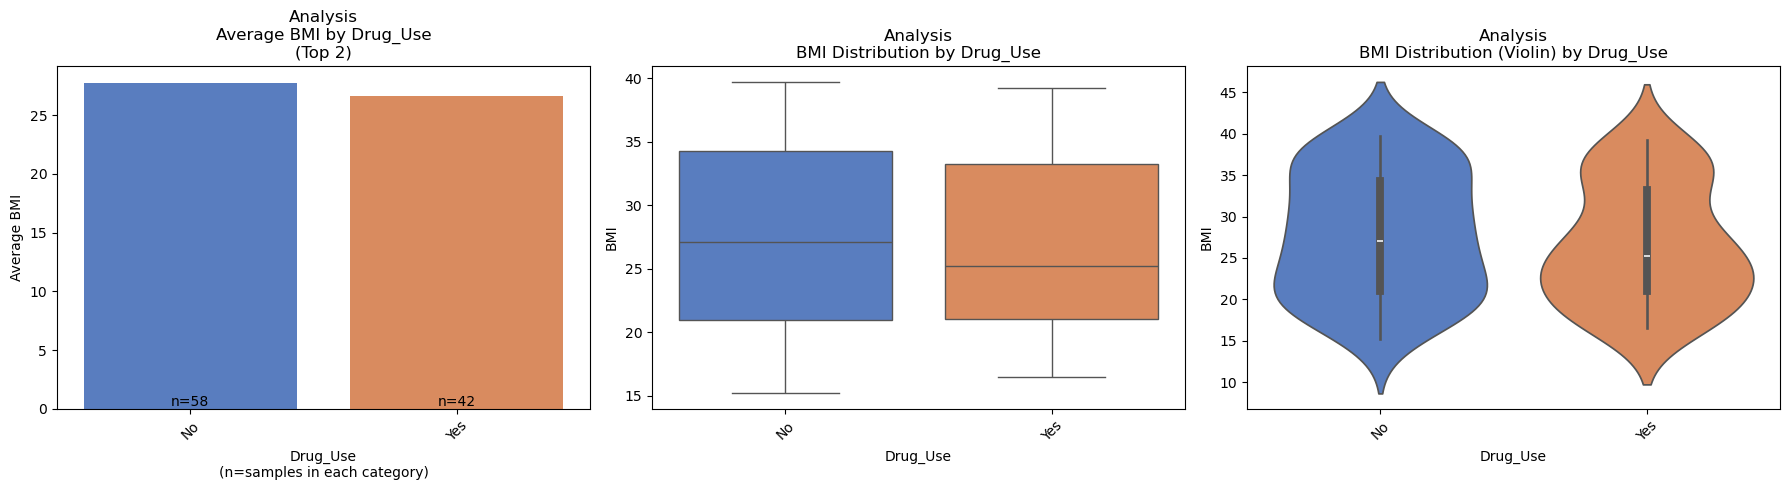

Data has 399994 rows. Sampling 100 rows for analysis.
Drug_Use
Yes    55
No     45
Name: count, dtype: int64


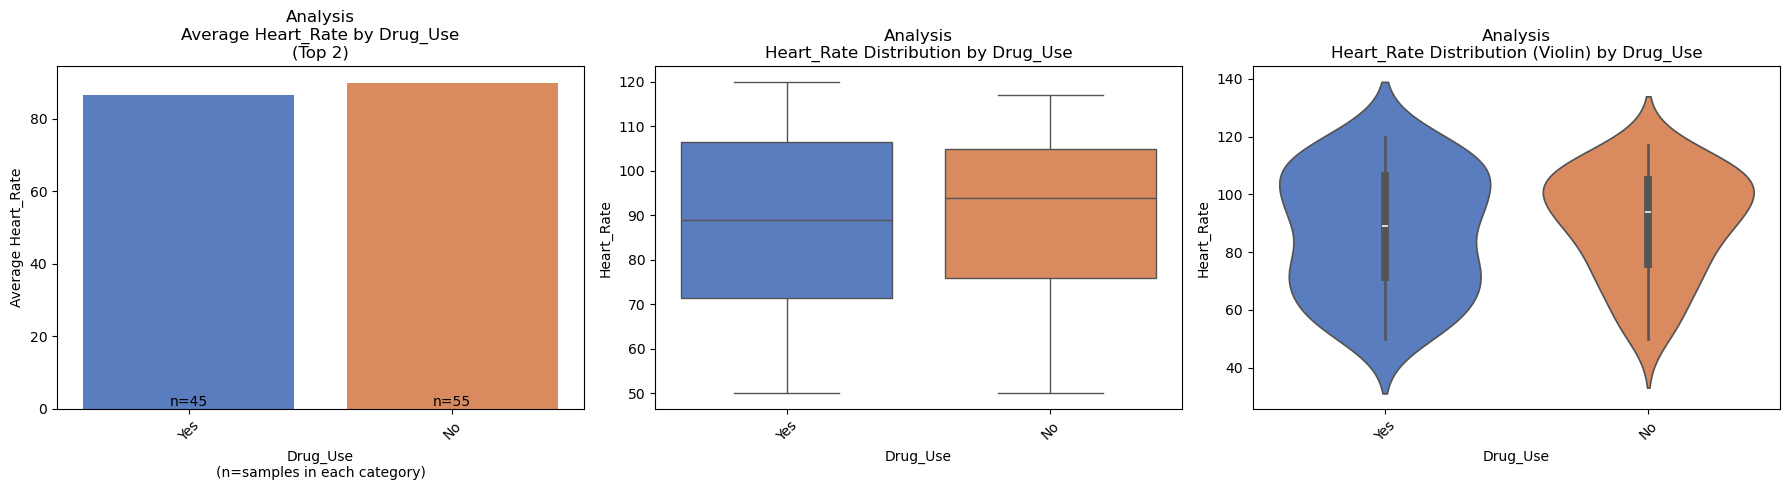

Data has 399994 rows. Sampling 100 rows for analysis.
Drug_Use
Yes    57
No     43
Name: count, dtype: int64


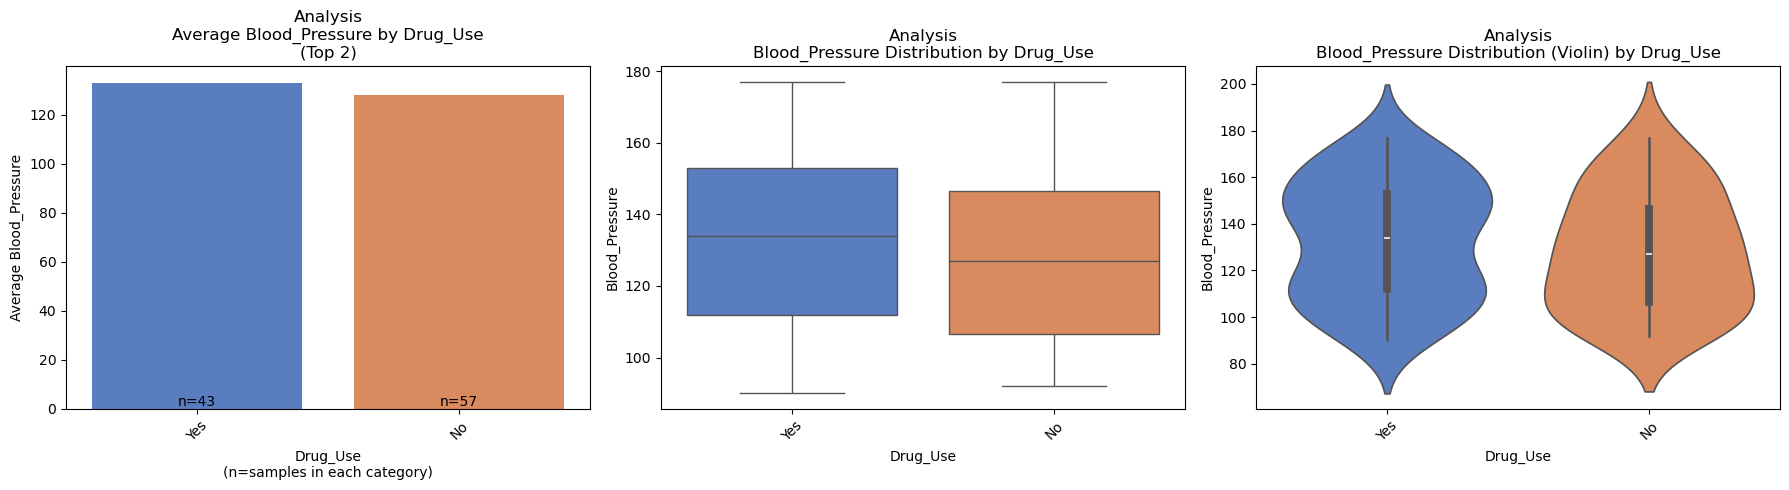

Data has 399994 rows. Sampling 100 rows for analysis.
Smoker
Yes    55
No     45
Name: count, dtype: int64


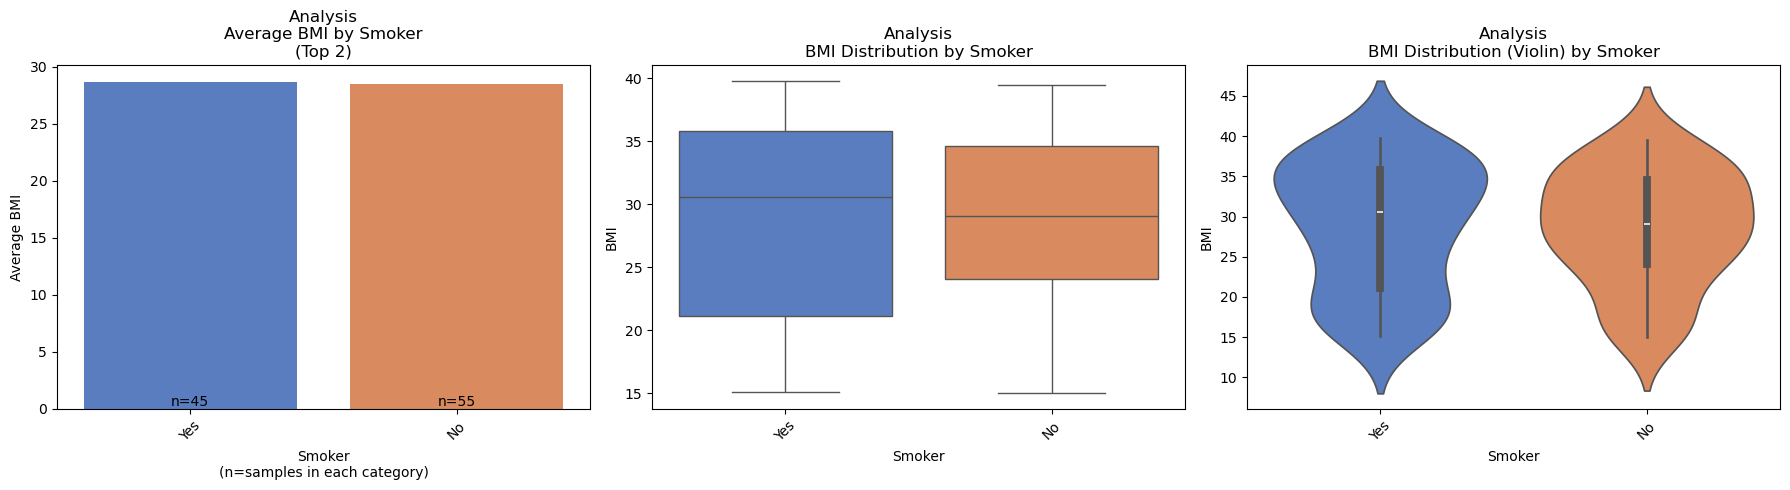

Data has 399994 rows. Sampling 100 rows for analysis.
Smoker
No     53
Yes    47
Name: count, dtype: int64


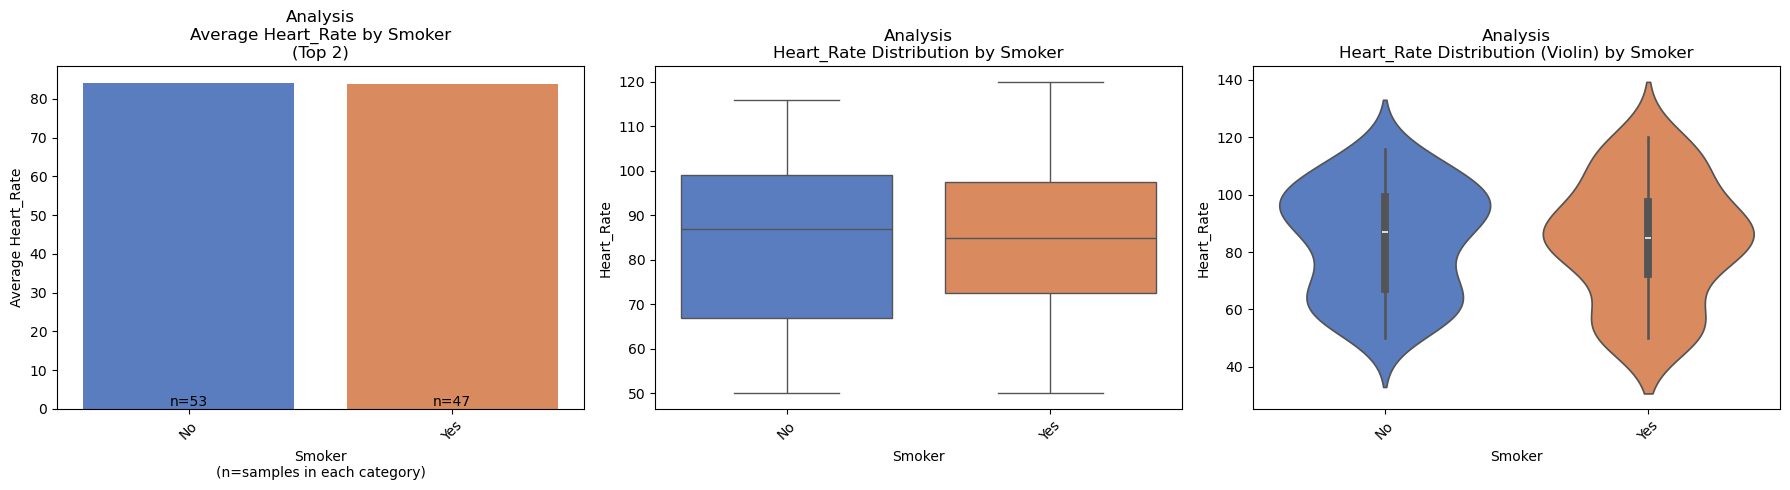

Data has 399994 rows. Sampling 100 rows for analysis.
Smoker
No     51
Yes    49
Name: count, dtype: int64


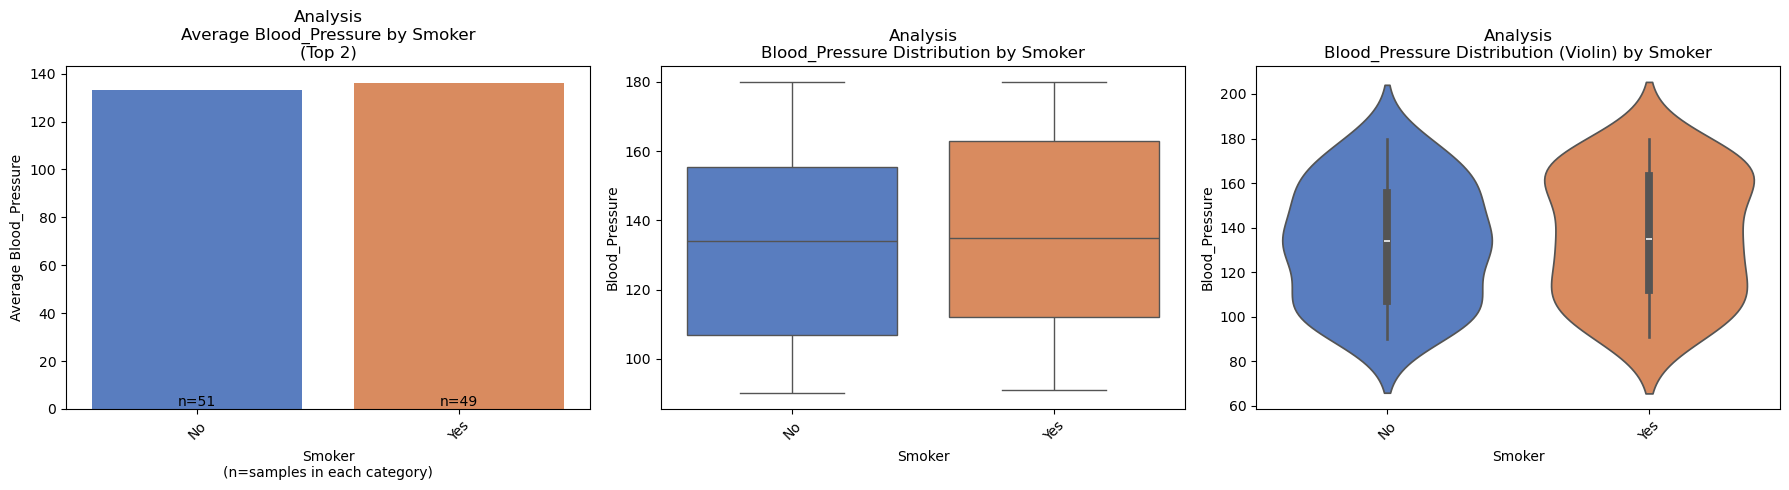

In [8]:
plot_categorical_relationships(Categorical_Columns="Drug_Use", Numerical_Columns="BMI",sample_data=100)
plot_categorical_relationships(Categorical_Columns="Drug_Use", Numerical_Columns="Heart_Rate",sample_data=100)
plot_categorical_relationships(Categorical_Columns="Drug_Use", Numerical_Columns="Blood_Pressure",sample_data=100)
plot_categorical_relationships(Categorical_Columns="Smoker", Numerical_Columns="BMI",sample_data=100)
plot_categorical_relationships(Categorical_Columns="Smoker", Numerical_Columns="Heart_Rate",sample_data=100)
plot_categorical_relationships(Categorical_Columns="Smoker", Numerical_Columns="Blood_Pressure",sample_data=100)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import xgboost as xgb

In [10]:
df.head()

,Age,Gender,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,Stress_Level,...,Drug_Use,Sleep_Hours,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Medication
0,74,Female,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,High,...,No,9,162,52,No,Abnormal,102.0,No,Yes,Yes
1,68,Male,38.3,Yes,Yes,No,276.3,High,Healthy,High,...,No,6,150,97,No,Normal,186.9,Yes,No,Yes
2,50,Male,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,High,...,Yes,9,98,67,Yes,Normal,71.4,No,Yes,No
3,29,Male,34.0,No,No,No,224.8,High,Healthy,Low,...,Yes,5,99,87,No,Normal,191.0,No,No,Yes
4,62,Male,25.1,No,No,No,128.0,Moderate,Healthy,Low,...,Yes,4,128,89,No,Abnormal,184.1,Yes,No,No


In [11]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male

Column: Smoker
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: Hypertension
0 -> No
1 -> Yes

Column: Physical_Activity
0 -> High
1 -> Low
2 -> Moderate

Column: Diet
0 -> Healthy
1 -> Unhealthy

Column: Stress_Level
0 -> High
1 -> Low
2 -> Moderate

Column: Alcohol_Consumption
0 -> No
1 -> Yes

Column: Drug_Use
0 -> No
1 -> Yes

Column: Chest_Pain
0 -> No
1 -> Yes

Column: ECG_Results
0 -> Abnormal
1 -> Normal

Column: Angina
0 -> No
1 -> Yes

Column: Cardiac_Arrest
0 -> No
1 -> Yes

Column: Medication
0 -> No
1 -> Yes



In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Angina',axis = 1)
y = df['Angina']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,X_test.shape)

(319995, 20) (79999, 20)


In [14]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [15]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Mean Squared Error: {rf_mse}")
print(f"R2 Score: {rf_r2}")

Mean Squared Error: 0.10102626282828535
R2 Score: 0.5958934316707609


In [16]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train),
xgb_y_pred = xgb_model.predict(X_test)

In [17]:
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"Mean Squared Error: {xgb_mse}")
print(f"R2 Score: {xgb_r2}")

Mean Squared Error: 0.2420723626039635
R2 Score: 0.03170686960220337


Classification Accuracy: 0.8977237215465194
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     39922
           1       0.90      0.89      0.90     40077

    accuracy                           0.90     79999
   macro avg       0.90      0.90      0.90     79999
weighted avg       0.90      0.90      0.90     79999



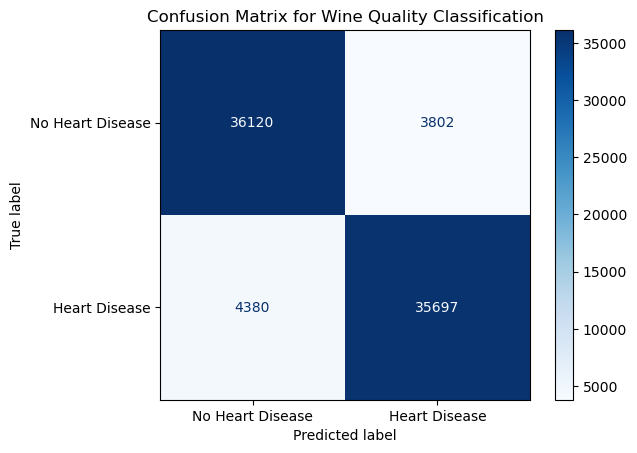

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Initialize and train the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_class = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Wine Quality Classification")
plt.show()